# IT44 TP3: Courbes de Bezier et B-splines
---

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='bezier.png'  width="500px">       
    </tr>
</table>
Dans ce TP vous allez travailler sur l'algorithme de de Casteljau pour tracer des courbes de Bézier et tracer également des fonctions B-splines.

## Algorithme de de Casteljau

Ecrire un fonction ```Casteljau(P_0,..,P_n,t)``` s'appuyant sur l'algorithme de de Castejau qui étant donnée un polygone de contrôle ${\bf P}=(P_0,\dots, P_n)$ et étant donné un temps $t\in [0,1]$, calcule les coordonnées de $P_n ^n(t)$.

In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def deCasteljau(points,t):
    if len(points) == 1 : return points[0]
    else :
        new_points = []
        for i in range(len(points)-1):
            x = (1-t)*points[i][0] + t*points[i+1][0]
            y = (1-t)*points[i][1] + t*points[i+1][1]
            new_points.append([x,y])
        return deCasteljau(new_points,t)

In [4]:
p10 = [2,0]
p11 = [1, 1]
p12 = [0, 1]
p13 = [-1, 1]

points2 = [p10, p11, p12, p13]

deCasteljau(points2, 1/2)

[0.5, 0.875]

## Tracé d'une courbe de Bézier

Utiliser la fonction précédente pour tracer des exemples de courbes de Bézier pour des polygones de contrôle de votre choix.



In [5]:
def bezier(points):
    t = 0
    while (t <= 1):
        plt.plot(deCasteljau(points,t)[0], deCasteljau(points,t)[1],'bo')
        t+=0.001
    plt.show()

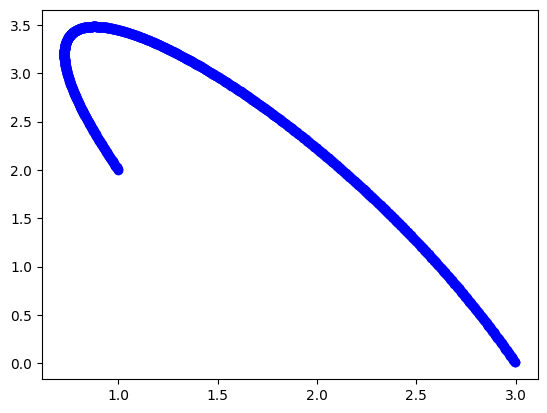

In [6]:
p0 = [1,2]
p1 = [0,5]
p2 = [2,3]
p3 = [3,0]
points = [p0,p1,p2,p3]

bezier(points)




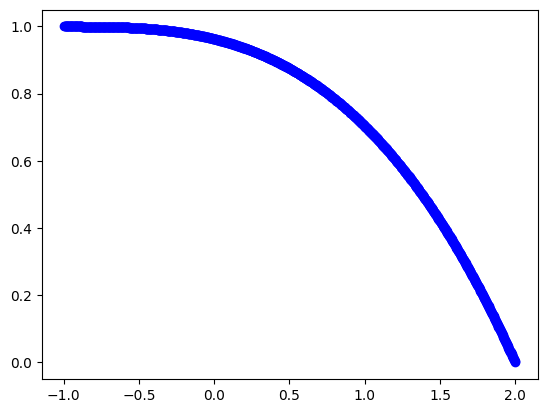

In [7]:
p10 = [2,0]
p11 = [1, 1]
p12 = [0, 1]
p13 = [-1, 1]

points2 = [p10, p11, p12, p13]

bezier(points2)

## Tracé d'une courbe de Bézier via les polynôme de Berstein


On admet la relation suivante entre les polynômes de la base de Bernstein $B_i ^n$, $i=0,\dots,n$ et la base canonique de $\mathbb{R}_n[x]$, $1,x,x^2,\dots,x^n$.
<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='bernstein.svg'  width="500px">       
    </tr>
</table>

Etant donné un polygone de contrôle ${\bf P}=(P_0,\dots,P_n)$ et un temps $t\in [0,1]$, écrire deux fonctions qui expriment les polynômes $x(t)$ et $y(t)$ dans la base canonique (votre fonction pourra produire un vecteur pour les coefficients de $x$ et un vecteur pour les coefficients de $y$).

Utiliser cette construction pour tracer la courbe paramétrée $\gamma(t)=(x(t),y(t)$ en utilisant l'algorithme de Horner.

Comparer les temps d'exécution du tracé avec la méthode de de Casteljau.

In [15]:
import math
def param_x(u, i, m):
    res = 0
    for l in range(i, m+1):
        res += math.comb(m, l) * math.comb(l, i) * (-1)**(l-i) * u**l

    return res
param_x(2, 4, 6)

def param_y(u, i, m):
    res = 0
    for l in range(i, m+1):
        res += math.comb(m)

## Fonction B-splines

Ecrire une fonction qui étant donnée un vecteur noeud $\tau=(t_0,\dots, t_m)$ et le choix d'un degré $k$ calcule les fonction B-splines $B_{i,k}$ pour $k=0,\dots,m-k-1$.

Donner des représentations graphiques des fonctions B-splines associées à un noeuds donné

In [9]:
def w(x, i, j, tau):
    """
    Calcule w_i,j (x) pour le vecteur noeud `tau`
    """
    if tau[i] < tau[i + j]:
        return (x - tau[i]) / (tau[i + j]-tau[i])
    else:
        return 0

In [10]:
def b(x, i, k, tau):
    """
    Calcule B_i,k (x) pour le vecteur noeud `tau`
    """
    if k == 0:
        return 1 if tau[i] <= x < tau[i + 1] else 0
    else:
        w1 = w(x, i, k, tau)
        w2 = 1 - w(x, i + 1, k, tau)
        return w1 * b(x, i, k - 1, tau) + w2 * b(x, i + 1, k - 1, tau)
    
    

In [11]:
b(2, 1, 2, [0, 1, 2, 2, 4])

1.0

In [12]:
def plot_bspline(i, k, tau):
    x = np.linspace(tau[0], tau[-1], 100)


    for deg in k:
        y = [b(val, i, deg, tau) for val in x]
        plt.plot(x, y, label=f'$B_{{{i},{deg}}}(x)$')

    plt.title(f"Fonctions B-Spline pour tau={tau}")
    plt.xlabel('x')
    plt.ylabel('B(x)')
    plt.legend()
    plt.show()

In [16]:
plot_bspline(0, [0, 1, 2], [0,1,2,2,4])

NameError: name 'np' is not defined

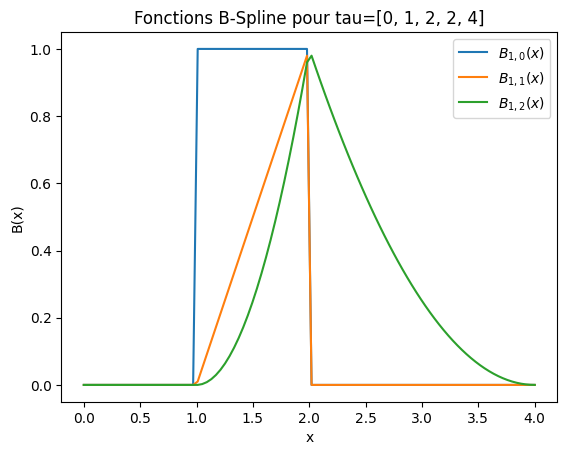

In [ ]:
plot_bspline(1, [0, 1, 2], [0,1,2,2,4])

# TD 3 : exercice 1 

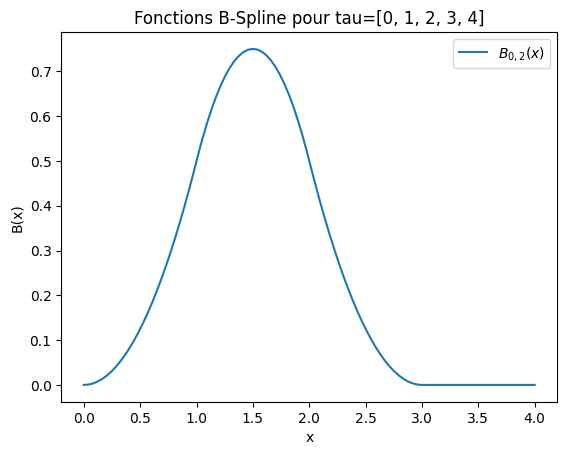

In [22]:
plot_bspline(0, [2], [0, 1, 2, 3, 4])